In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
play_inc_df = pd.read_csv('play_inc_clean.csv',index_col=0)
play_inc_df.head()

,Accessible,Adaptive_Swing,Level,Location,Name,Playground_ID,Prop_ID,lat,lon,Zip,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip,est_median_inc
0,Y,N,4.0,"Noble, Franklin, Milton Streets",American Playground,B001,B001,40.7288,-73.9579,11222,22570.0,1.691879e+09,74961.408950,62850.112360
1,Y,N,4.0,BAY PKWY & CROPSEY AVENUE,Bensonhurst Park,B007-01,B007,40.5969,-73.9998,11214,40860.0,1.780414e+09,43573.519334,36122.280335
2,Y,N,1.0,DUMONT AVE & BRISTOL ST,Betsy Head Memorial Playground,B008-03,B008,40.6645,-73.9118,11212,38370.0,1.196980e+09,31195.725827,13046.153846
3,Y,N,2.0,BROOKLYN AVE & PROSPECT PL,Brower Park,B012-02,B012,40.6735,-73.9438,11213,29300.0,1.201558e+09,41008.805461,36607.792208
4,Y,Y,2.0,BROOKLYN AVE & PROSPECT PL,Brower Park,B012-03,B012,40.6744,-73.9432,11213,29300.0,1.201558e+09,41008.805461,36607.792208


In [21]:
play_inc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 14 columns):
Accessible             996 non-null object
Adaptive_Swing         911 non-null object
Level                  915 non-null float64
Location               996 non-null object
Name                   999 non-null object
Playground_ID          999 non-null object
Prop_ID                999 non-null object
lat                    992 non-null float64
lon                    992 non-null float64
Zip                    999 non-null int64
tot_inc_num_returns    999 non-null float64
tot_inc_amnt           999 non-null float64
avg_inc_by_zip         999 non-null float64
est_median_inc         999 non-null float64
dtypes: float64(7), int64(1), object(6)
memory usage: 117.1+ KB


In [22]:
play_inc_df.nunique()

Accessible               2
Adaptive_Swing           2
Level                    4
Location               991
Name                   956
Playground_ID          999
Prop_ID                833
lat                    850
lon                    821
Zip                    160
tot_inc_num_returns    158
tot_inc_amnt           160
avg_inc_by_zip         160
est_median_inc         160
dtype: int64

In [23]:
play_inc_df.describe()

,Level,lat,lon,Zip,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip,est_median_inc
count,915.000000,992.000000,992.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000
mean,3.456831,40.690351,-73.921920,10809.100100,28574.854855,2.182111e+09,81177.012988,41643.355095
std,0.854288,1.296029,0.084842,549.377976,11027.281189,2.451341e+09,91592.373813,29875.797071
min,1.000000,0.000000,-74.244900,10001.000000,2170.000000,1.395610e+08,26163.643617,11574.456219
25%,3.000000,40.674150,-73.970025,10309.000000,18980.000000,9.971860e+08,38734.483812,13532.466896
50%,4.000000,40.726600,-73.925800,11201.000000,30420.000000,1.393923e+09,50839.684516,36794.402985
75%,4.000000,40.805125,-73.874750,11234.000000,36200.000000,2.258242e+09,71830.167443,37734.666667
max,4.000000,40.902500,-73.709600,11694.000000,53900.000000,1.193657e+10,886241.279070,148632.692308


### Summary of Data

- 999 rows, 14 columns (8 numerical, 6 string), 160 unique NYC zip codes, 999 unique playground_ids over 833 different properties (some properties house multiple playgrounds)
- Each Zip Code of interest in NYC had at least 2,170 tax returns and at most 539,000 tax returns to work with, on average each NY zip included aboout 28.6K tax returns

- **'Arithmetic Average Income By Zip'**: 
    - Takes the arithmetic average by zip using ( total income / total # of returns) by zip
    - Skewed up by large outliers
    - Mean: 81,177 
    - Median: 50,840
    - StdDev: 91,592
    - Min: 26,164
    - Max: 886,241

- **'Estimated Median Income By Zip'**: An Alternative Computation slightly more resistant to large outliers 
    - Estimates the Median Income Using the Arithmetic Average Income by Zip & IncomeBucket that falls in the center of the ordered distribution based on the number of tax returns filed in each Zip Code
        - Said differently, the number represents the average income of the group that houses the tax return that sits at 50th Percentile of that income bucket group for that zip code
    - Mean: 41,643
    - Median: 36,794
    - StdDev: 29,876
    - Min: 11,575
    - Max: 148,633
    

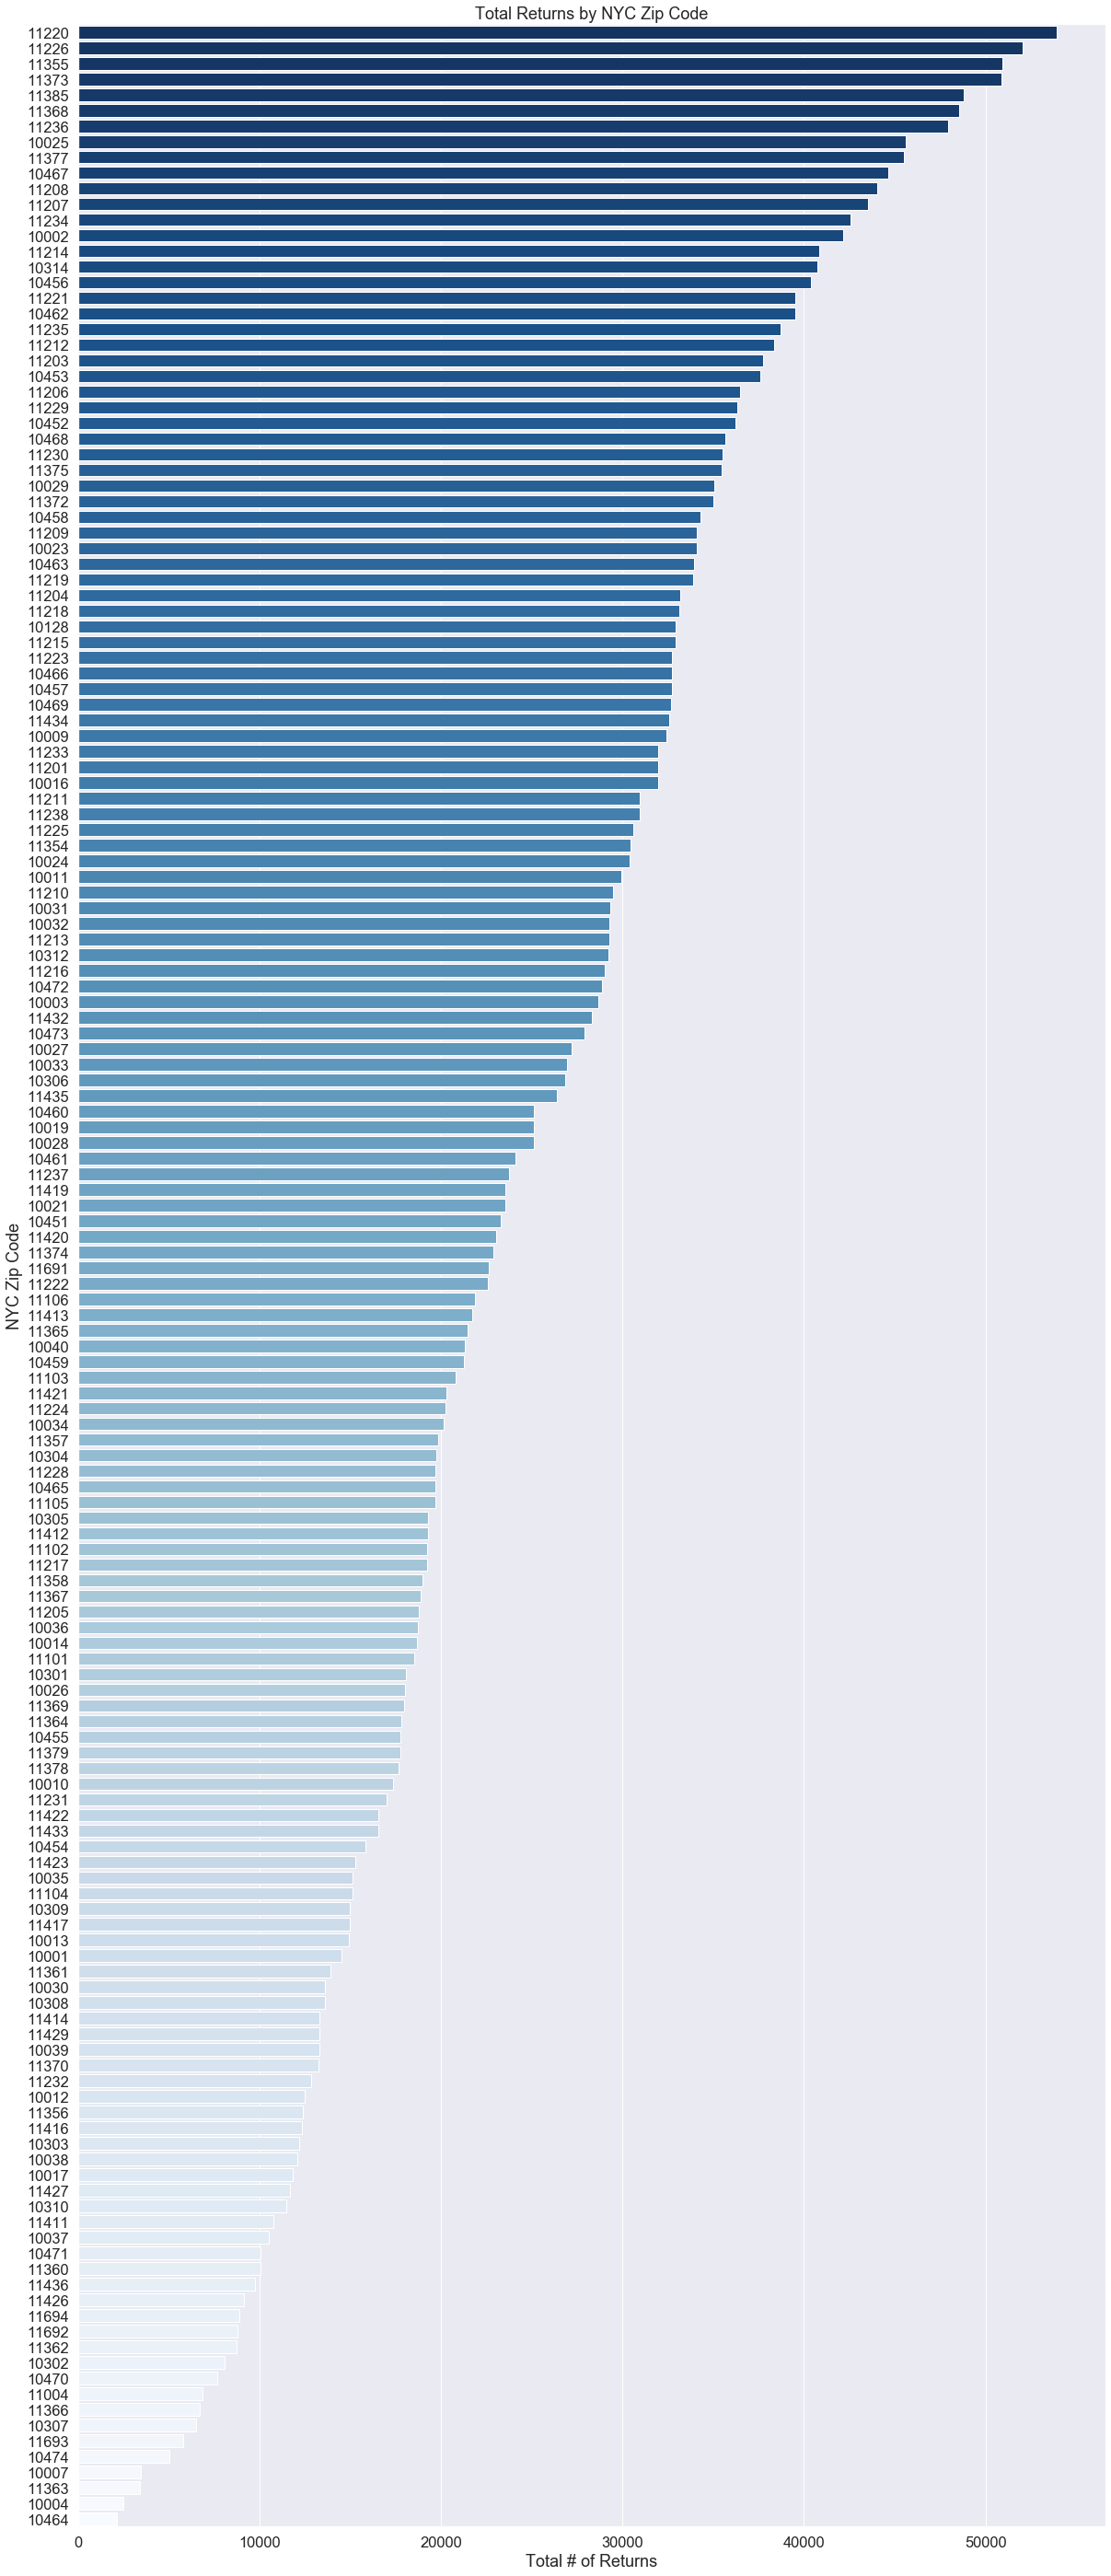

In [90]:
fig, ax = plt.subplots(figsize=(20,50))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
ax = sns.barplot(x="tot_inc_num_returns", y="Zip", 
                 data=play_inc_df, palette = 'Blues_r', orient='h',
                 order=play_inc_df.sort_values('tot_inc_num_returns',ascending=False)['Zip'].unique())
plt.xlabel('Total # of Returns')
plt.ylabel('NYC Zip Code')
plt.title('Total Returns by NYC Zip Code');

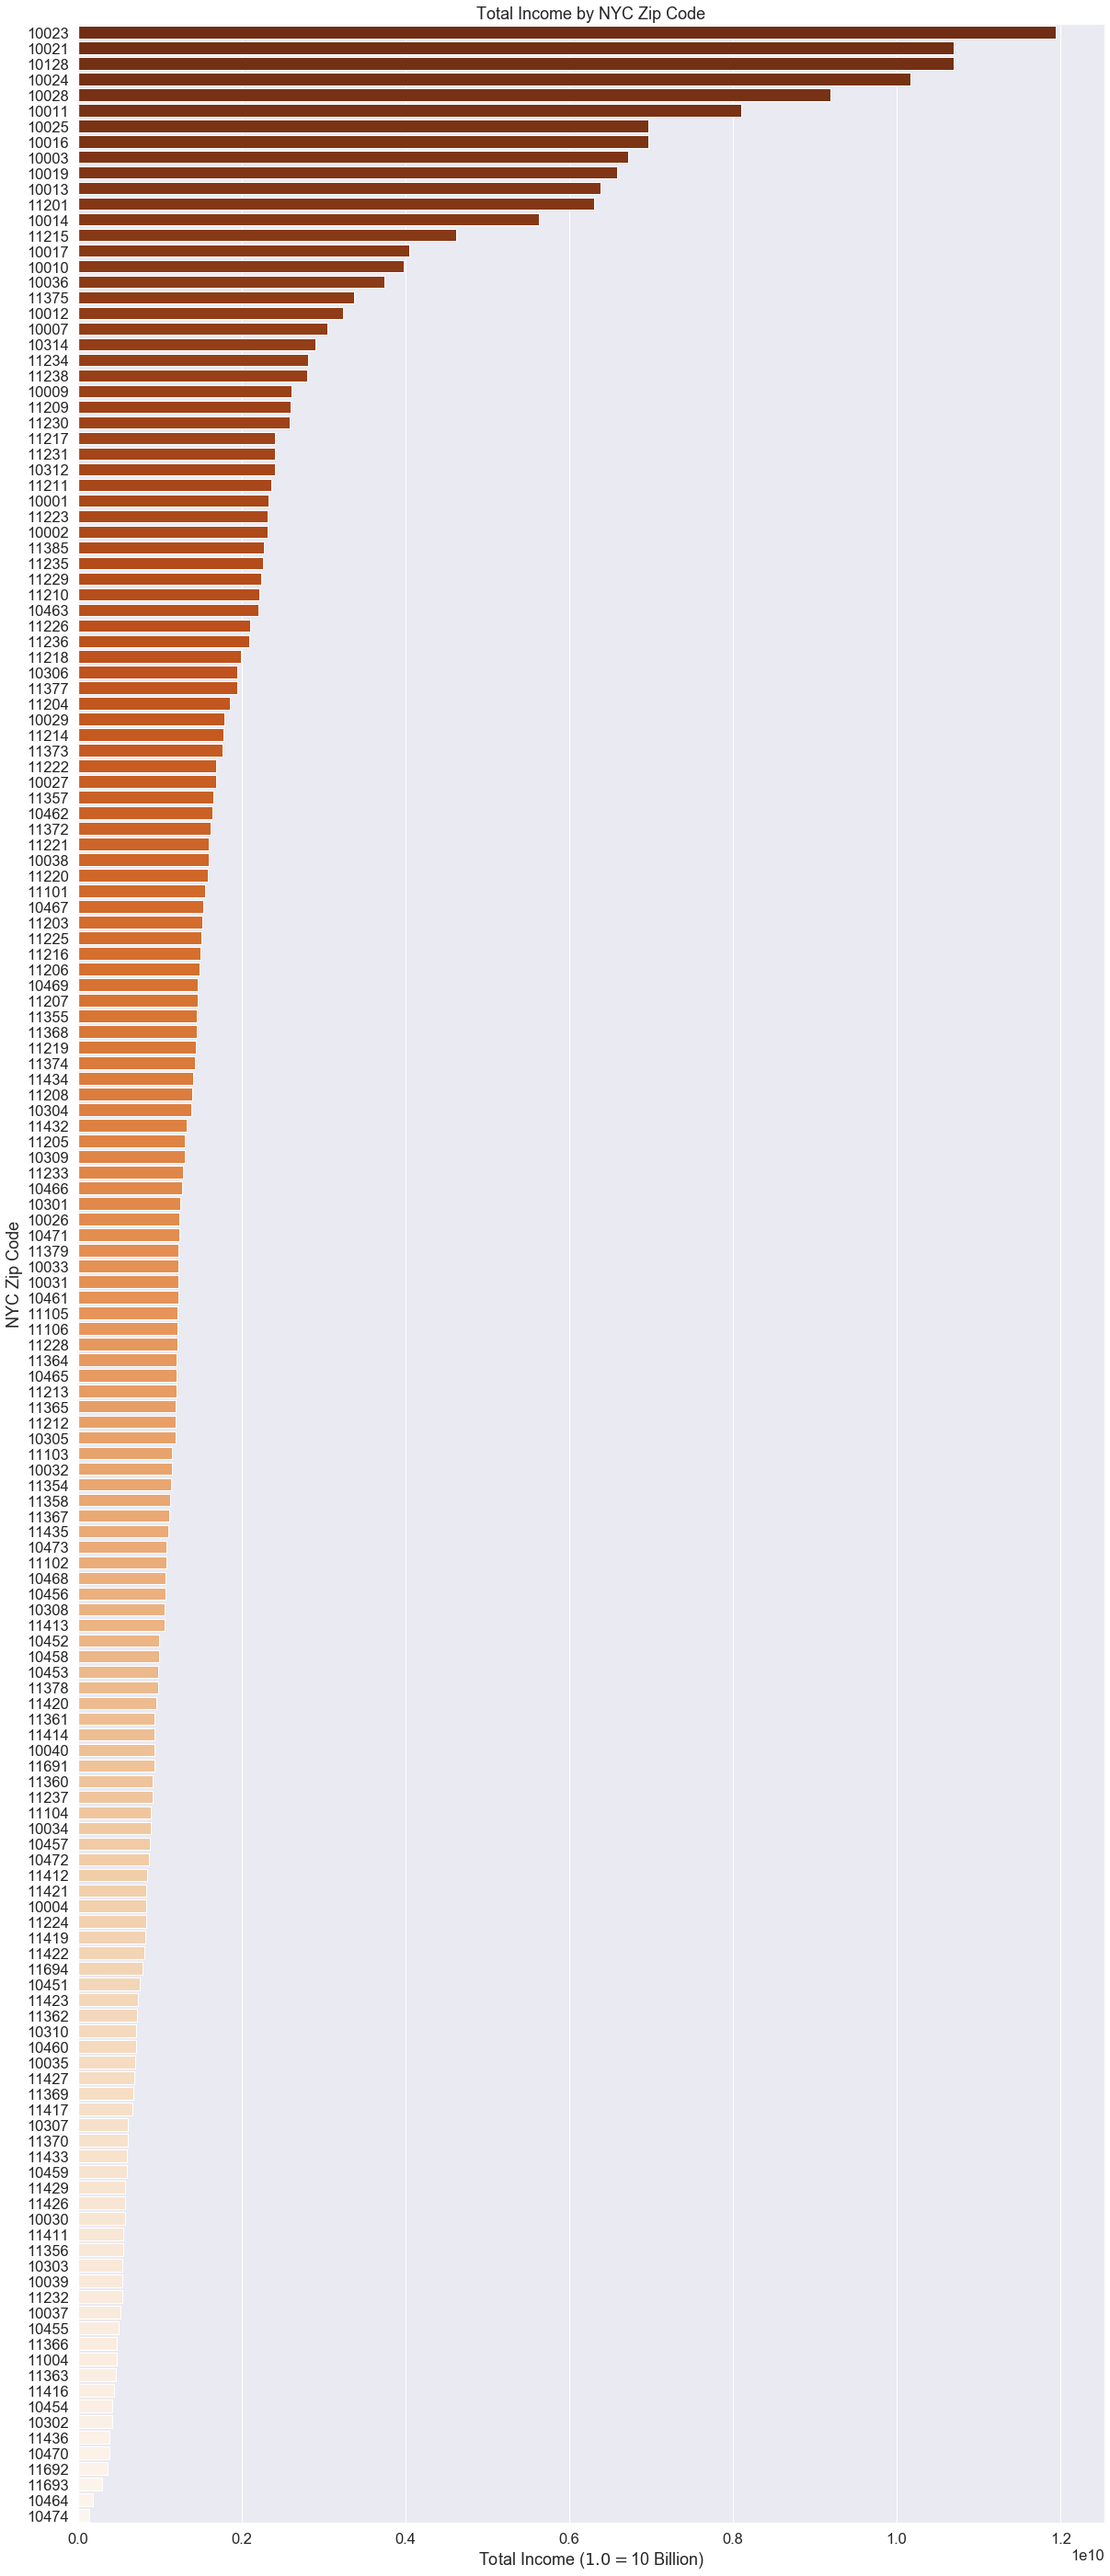

In [101]:
fig, ax = plt.subplots(figsize=(20,50))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
ax = sns.barplot(x="tot_inc_amnt", y="Zip", 
                 data=play_inc_df, palette = 'Oranges_r', orient='h',
                 order=play_inc_df.sort_values('tot_inc_amnt',ascending=False)['Zip'].unique())
plt.xlabel('Total Income ($1.0 = $10 Billion)')
plt.ylabel('NYC Zip Code')
plt.title('Total Income by NYC Zip Code');

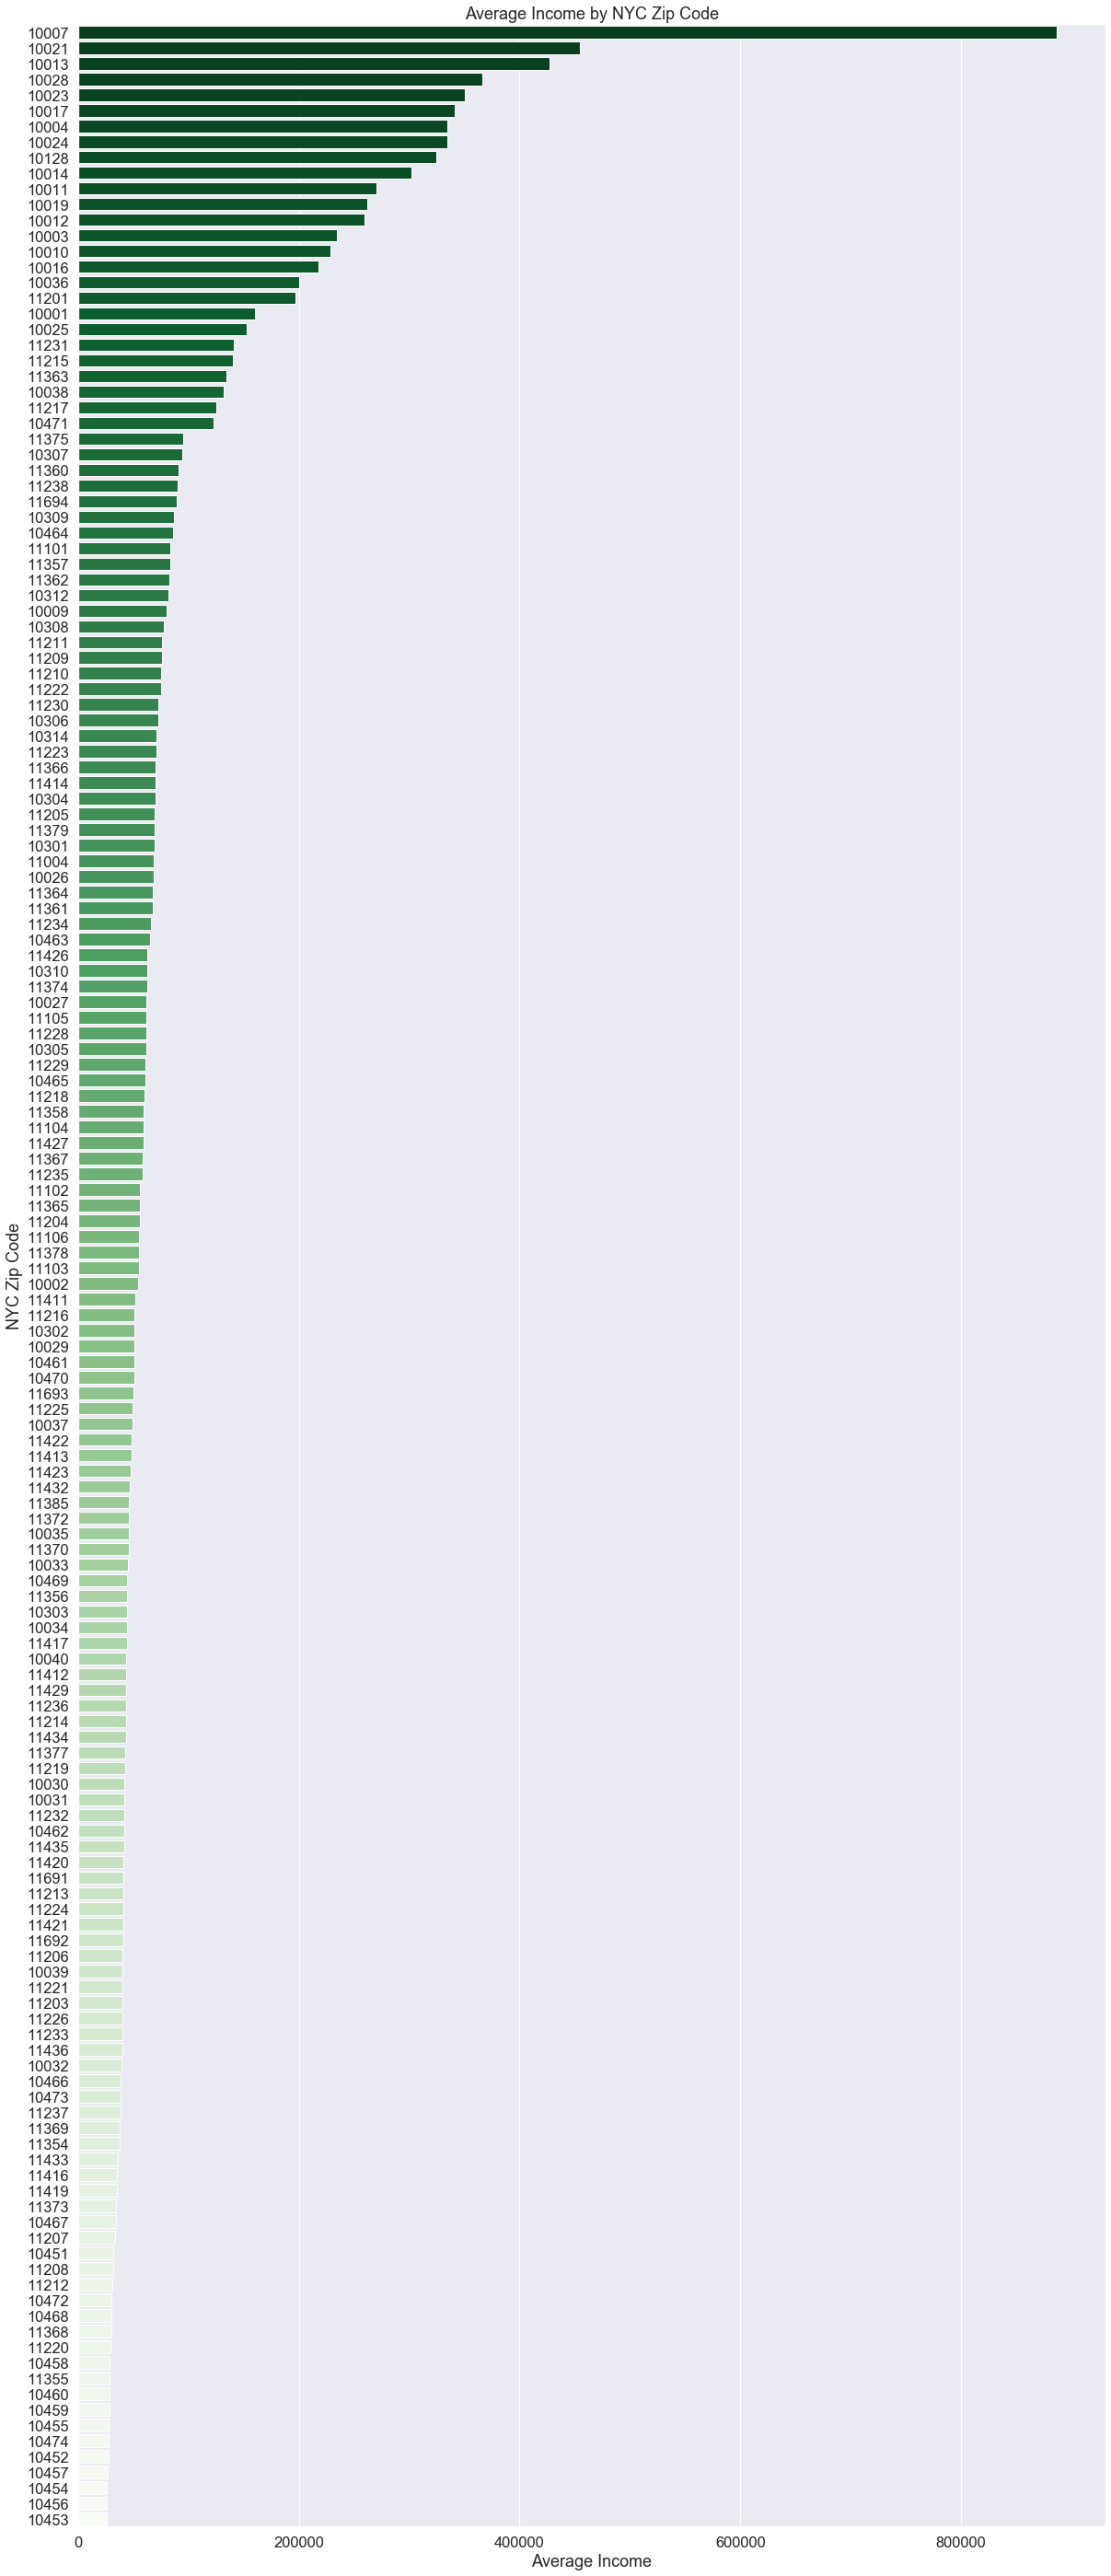

In [96]:
fig, ax = plt.subplots(figsize=(20,50))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
ax = sns.barplot(x="avg_inc_by_zip", y="Zip", 
                 data=play_inc_df, palette = 'Greens_r', orient='h',
                 order=play_inc_df.sort_values('avg_inc_by_zip',ascending=False)['Zip'].unique())
plt.xlabel('Average Income')
plt.ylabel('NYC Zip Code')
plt.title('Average Income by NYC Zip Code');

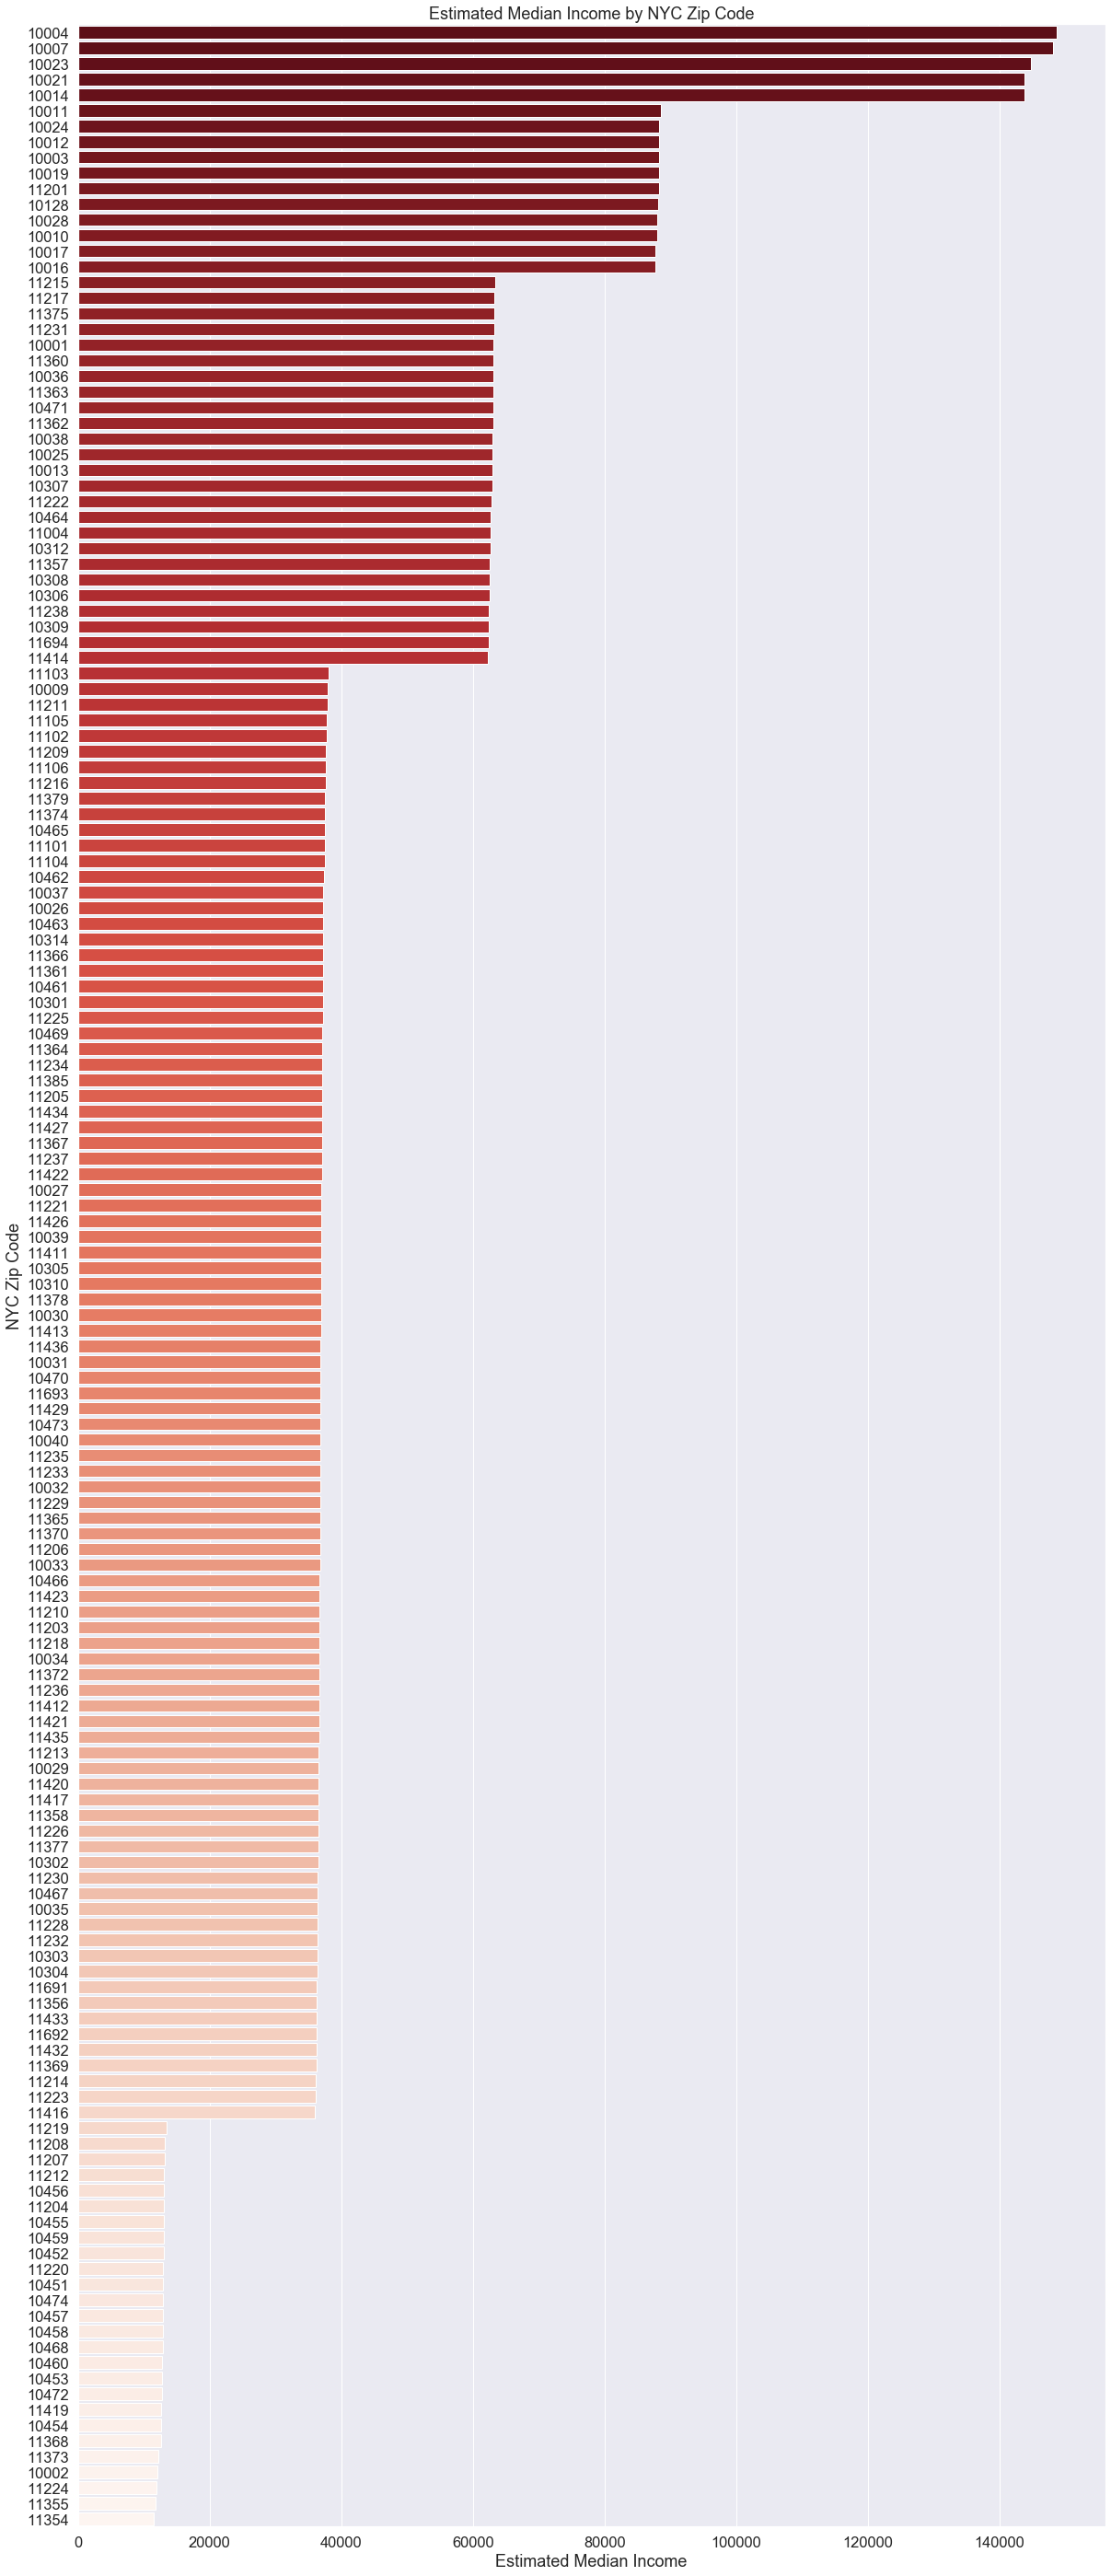

In [98]:
fig, ax = plt.subplots(figsize=(20,50))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
ax = sns.barplot(x="est_median_inc", y="Zip", 
                 data=play_inc_df, palette = 'Reds_r', orient='h',
                 order=play_inc_df.sort_values('est_median_inc',ascending=False)['Zip'].unique())
plt.xlabel('Estimated Median Income')
plt.ylabel('NYC Zip Code')
plt.title('Estimated Median Income by NYC Zip Code');

#### Joining Playground/Property Counts by Zip with Income Data by Zip

In [122]:
income_by_zip = play_inc_df[['Zip','tot_inc_num_returns',
                            'tot_inc_amnt',
                            'avg_inc_by_zip',
                            'est_median_inc']].groupby('Zip').mean()
income_by_zip.head()

,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip,est_median_inc
Zip,,,,
10001,14520.0,2.323084e+09,159992.011019,63177.948718
10002,42180.0,2.313723e+09,54853.556188,12081.728045
10003,28660.0,6.720746e+09,234499.162596,88263.975155
10004,2480.0,8.308280e+08,335011.290323,148632.692308
10007,3440.0,3.048670e+09,886241.279070,148137.288136


In [123]:
playgrounds_by_zip = play_inc_df[['Zip','Playground_ID','Prop_ID']].groupby('Zip').count()
playgrounds_by_zip.head()

,Playground_ID,Prop_ID
Zip,,
10001,3,3
10002,22,22
10003,4,4
10004,1,1
10007,3,3


In [130]:
relationship_df = pd.merge(left=playgrounds_by_zip,right=income_by_zip,how='inner',on='Zip')
relationship_df.head()

,Playground_ID,Prop_ID,tot_inc_num_returns,tot_inc_amnt,avg_inc_by_zip,est_median_inc
Zip,,,,,,
10001,3,3,14520.0,2.323084e+09,159992.011019,63177.948718
10002,22,22,42180.0,2.313723e+09,54853.556188,12081.728045
10003,4,4,28660.0,6.720746e+09,234499.162596,88263.975155
10004,1,1,2480.0,8.308280e+08,335011.290323,148632.692308
10007,3,3,3440.0,3.048670e+09,886241.279070,148137.288136


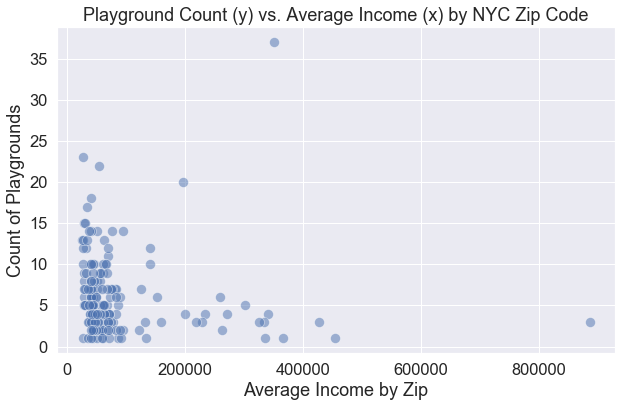

In [155]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
ax = sns.scatterplot(x="avg_inc_by_zip", y="Playground_ID", 
                     data=relationship_df, s=100, alpha = 0.5)
plt.xlabel('Average Income by Zip')
plt.ylabel('Count of Playgrounds')
plt.title('Playground Count (y) vs. Average Income (x) by NYC Zip Code');

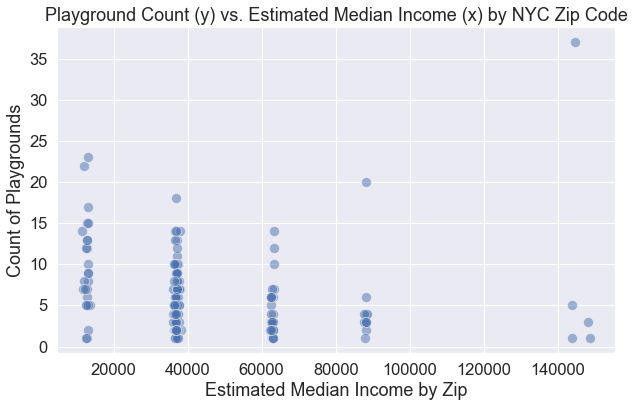

In [156]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
ax = sns.scatterplot(x="est_median_inc", y="Playground_ID", 
                     data=relationship_df, s=100, alpha = 0.5)
plt.xlabel('Estimated Median Income by Zip')
plt.ylabel('Count of Playgrounds')
plt.title('Playground Count (y) vs. Estimated Median Income (x) by NYC Zip Code');